## Preparing the Dataset to YOLO

In [1]:
import yaml

data = {'path':'../yolo_dataset',
        'train':'images/train',
        'val': 'images/val',
        'names':{
            0:'Bus',
            1:'Truck'
        }
        }

try:
    with open('bus_truck.yaml', 'w') as file:
        yaml.dump(data, file, default_flow_style=False)
    print("YAML file created successfully.")
except Exception as e:
    print(f"Error writing YAML file: {e}")

YAML file created successfully.


In [ ]:
import pandas as pd
import dataset, importlib
importlib.reload(dataset)
from dataset import YoloDataset
df = pd.read_csv('../dataset/df.csv')
train = YoloDataset(df,index=(0,0.8)) # 80% Train
val = YoloDataset(df,index=(0.8,1), mode='val') # 20% val
print(len(train))

15225


> The images are now copied to `yolo_dataset/train/images/train` and `yolo_dataset/train/images/val`. The labels have also been converted to the YOLO format and can be found in `yolo_dataset/labels/train` and `yolo_dataset/labels/val` as required by YOLO.


# Train the model

In [3]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml')
model.train(data='bus_truck.yaml', epochs=10)

New https://pypi.org/project/ultralytics/8.3.167 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.143  Python-3.12.10 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bus_truck.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, op

train: Scanning C:\Users\moata\ThKoeln\0_Projects\Bus_Truck_Object_detection\yolo_dataset\labels\train... 12180 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12180/12180 [00:05<00:00, 2427.41it/s]


train: New cache created: C:\Users\moata\ThKoeln\0_Projects\Bus_Truck_Object_detection\yolo_dataset\labels\train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.10.0 ms, read: 35.86.1 MB/s, size: 21.5 KB)


val: Scanning C:\Users\moata\ThKoeln\0_Projects\Bus_Truck_Object_detection\yolo_dataset\labels\val... 3045 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3045/3045 [00:01<00:00, 2137.05it/s]

val: New cache created: C:\Users\moata\ThKoeln\0_Projects\Bus_Truck_Object_detection\yolo_dataset\labels\val.cache


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.17G       2.51      3.518      3.295          5        640: 100%|██████████| 762/762 [01:50<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:14<00:00,  6.48it/s]


                   all       3045       4860      0.321      0.155      0.136     0.0658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.84G      1.807      2.367      2.324          6        640: 100%|██████████| 762/762 [01:47<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:14<00:00,  6.80it/s]


                   all       3045       4860      0.509      0.375      0.385       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.84G      1.562       1.99      2.045          7        640: 100%|██████████| 762/762 [01:44<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:14<00:00,  6.79it/s]

                   all       3045       4860      0.539      0.368      0.395      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.84G      1.423      1.775      1.885          4        640: 100%|██████████| 762/762 [02:21<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:14<00:00,  6.82it/s]


                   all       3045       4860      0.592      0.444      0.487      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.84G      1.322      1.595      1.781         11        640: 100%|██████████| 762/762 [01:44<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:13<00:00,  7.12it/s]

                   all       3045       4860      0.661      0.513      0.573      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.84G      1.254      1.489      1.712          4        640: 100%|██████████| 762/762 [01:43<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:13<00:00,  6.93it/s]


                   all       3045       4860      0.619      0.497      0.539       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.84G        1.2      1.395      1.661          5        640: 100%|██████████| 762/762 [01:44<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:13<00:00,  7.28it/s]

                   all       3045       4860      0.674      0.561      0.622       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.84G      1.148       1.31      1.603          6        640: 100%|██████████| 762/762 [01:42<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:13<00:00,  6.90it/s]


                   all       3045       4860      0.735      0.557      0.635      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.84G      1.104      1.236      1.564          5        640: 100%|██████████| 762/762 [01:41<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:13<00:00,  7.02it/s]


                   all       3045       4860      0.738      0.586      0.668      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.84G      1.066      1.174      1.531          4        640: 100%|██████████| 762/762 [01:47<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:13<00:00,  6.91it/s]


                   all       3045       4860      0.764      0.593      0.685      0.502

10 epochs completed in 0.347 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.2MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.143  Python-3.12.10 torch-2.7.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLOv8n summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 96/96 [00:14<00:00,  6.63it/s]


                   all       3045       4860      0.764      0.592      0.685      0.502
                   Bus       1492       2384      0.805      0.653      0.741      0.582
                 Truck       1579       2476      0.724      0.532      0.629      0.422
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000151A4C55EB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [4]:
from ultralytics import YOLO
model = YOLO('runs/detect/train/weights/best.pt')


image 1/1 c:\Users\moata\ThKoeln\0_Projects\YOLO-from-Scratch\yolo\..\val_images\1.jpg: 480x640 1 Truck, 78.0ms
Speed: 1.9ms preprocess, 78.0ms inference, 103.0ms postprocess per image at shape (1, 3, 480, 640)


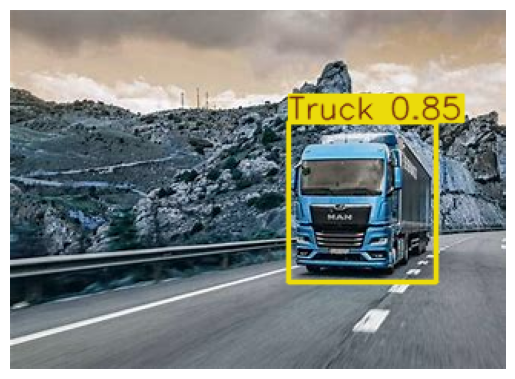

In [5]:
import matplotlib.pyplot as plt

img_path = '../val_images/1.jpg'
results = model.predict(img_path)

for result in results:
    # Get the annotated image as a NumPy array
    annotated_img = result.plot()

    # Display inline using matplotlib
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.show()


image 1/1 c:\Users\moata\ThKoeln\0_Projects\YOLO-from-Scratch\yolo\..\val_images\2.jpg: 416x640 1 Bus, 3 Trucks, 71.9ms
Speed: 1.9ms preprocess, 71.9ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 640)


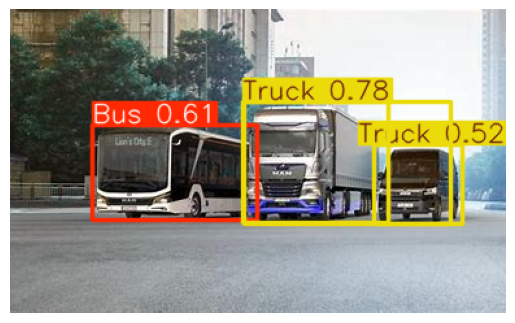

In [6]:
img_path = '../val_images/2.jpg'
results = model.predict(img_path)

for result in results:
    # Get the annotated image as a NumPy array
    annotated_img = result.plot()

    # Display inline using matplotlib
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.show()


image 1/1 c:\Users\moata\ThKoeln\0_Projects\YOLO-from-Scratch\yolo\..\val_images\3.jpg: 352x640 7 Buss, 81.9ms
Speed: 2.1ms preprocess, 81.9ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


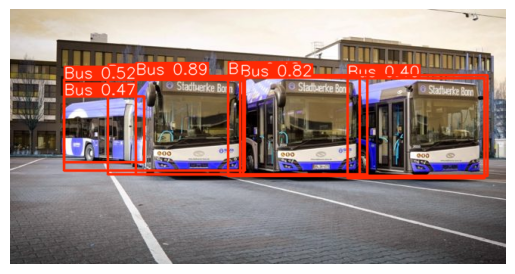

In [7]:
img_path = '../val_images/3.jpg'
results = model.predict(img_path)

for result in results:
    # Get the annotated image as a NumPy array
    annotated_img = result.plot()

    # Display inline using matplotlib
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.show()